---
layout: page
title: Correlação
nav_order: 11
---
[<img src="./colab_favicon_small.png" style="float: right;">](https://colab.research.google.com/github/flaviovdf/icd-bradesco/blob/master/_lessons/11-Correlacao.ipynb)

# Tópico 11 - Correlação

{: .no_toc .mb-2 }

Entendimento de relação entre dados.
{: .fs-6 .fw-300 }

{: .no_toc .text-delta }
Resultados Esperados

1. Entender como sumarizar dados em duas dimensões.
1. Entender correlação e covariância.
1. Entender o paradoxo de simpson.
1. Sumarização de dados em duas dimensões.
1. Correlação não é causalidade.

In [1]:
# -*- coding: utf8

from scipy import stats as ss

import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
plt.style.use('ggplot')

In [3]:
def despine(ax=None):
    if ax is None:
        ax = plt.gca()
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

## Introdução

Lembrando das aulas anteriores, podemos usar estatísticas para sumarizar dados e suas tendências centrais. Embora seja um campo rico, ainda não exploramos a ideia de tendências centrais em dados de duas dimensões. Nesta aula, teremos uma abordagem de exploração.

## Dados Sintéticos

Vamos inicial entendendo os gráficos de dispersão para pares de colunas. Inicialmente, queremos ter alguma indicação visual da correlação entre nossos dados. Sendo $X = \{x_1, x_2, \cdots\}$ e $Y = \{y_1, y_2, \cdots\}$ um par de colunas, o gráfico mostra um ponto em cada coordenada ($x_i$, $y_i$). 

No primeiro vamos mostrar um plot de números aleatórios de uma normal. Para cada linha, vamos gerar de forma **independente** outra normal. Como seria um formato esperado do gráfico?

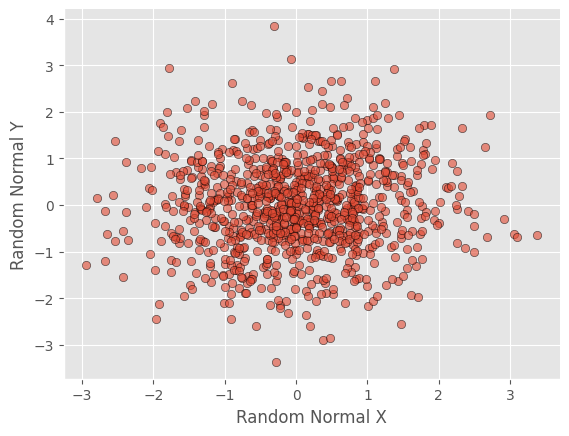

In [4]:
x = np.random.randn(1000)
y = np.random.randn(1000)
plt.scatter(x, y, edgecolor='k', alpha=0.6)
plt.xlabel('Random Normal X')
plt.ylabel('Random Normal Y')
despine()

No segundo vamos mostrar um plot no eixo x números aleatórios de uma normal. No eixo y, vamos plotar o valor de x adicionados de outra normal. Qual é o valor esperado?

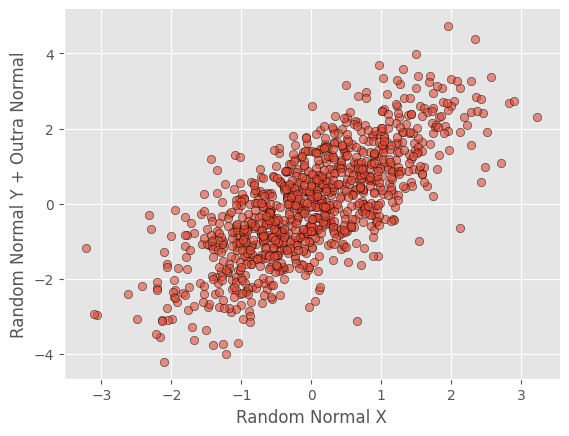

In [5]:
x = np.random.randn(1000)
y = x + np.random.randn(1000)
plt.scatter(x, y, edgecolor='k', alpha=0.6)
plt.xlabel('Random Normal X')
plt.ylabel('Random Normal Y + Outra Normal')
despine()

Agora vamos fazer $-x - Normal(0, 1)$.

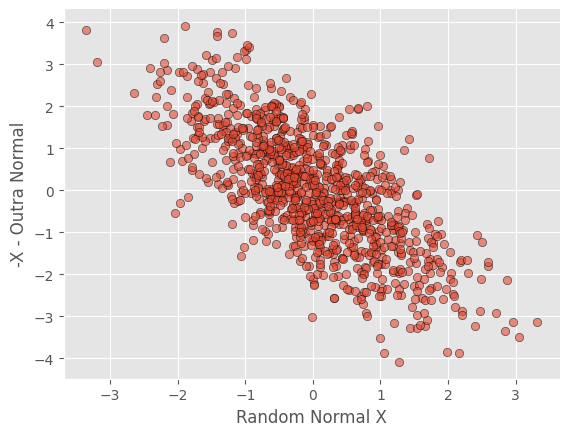

In [6]:
x = np.random.randn(1000)
y = -x - np.random.randn(1000)
plt.scatter(x, y, edgecolor='k', alpha=0.6)
plt.xlabel('Random Normal X')
plt.ylabel('-X - Outra Normal')
despine()

Por fim, um caso quadrático.

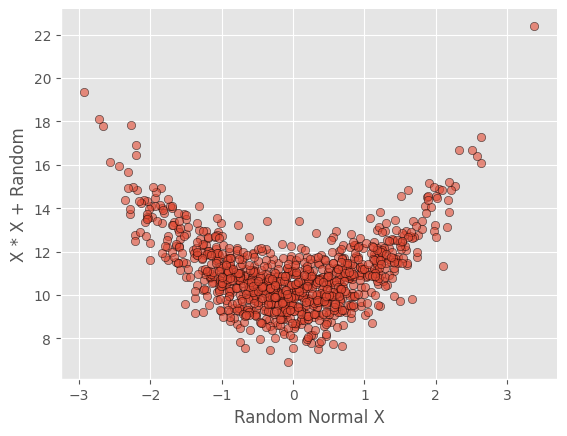

In [7]:
x = np.random.randn(1000)
y = x * x + np.random.randn(1000) + 10
plt.scatter(x, y, edgecolor='k', alpha=0.6)
plt.xlabel('Random Normal X')
plt.ylabel('X * X + Random')
despine()

## Dados Reais

Nesta aula vamos utilizados dados de preços de carros híbridos. Nos EUA, um carro híbrido pode rodar tanto em eletricidade quanto em combustível. A tabela contém as vendas de 1997 até 2003.

Uma máxima dessa aula será: **Sempre visualize seus dados**. 

As colunas são:

1. **vehicle:** model of the car
1. **year:** year of manufacture
1. **msrp:** manufacturer’s suggested retail price in 2013 dollars
1. **acceleration:** acceleration rate in km per hour per second
1. **mpg:** fuel econonmy in miles per gallon
1. **class:** the model’s class.

### Olhando para os Dados

Vamos iniciar olhando para cada coluna dos dados.

In [8]:
df = pd.read_csv('https://media.githubusercontent.com/media/icd-ufmg/material/master/aulas/15-Correlacao/hybrid.csv')
df['msrp'] = df['msrp'] / 1000
df.head()

,vehicle,year,msrp,acceleration,mpg,class
0,Prius (1st Gen),1997,24.50974,7.46,41.26,Compact
1,Tino,2000,35.35497,8.20,54.10,Compact
2,Prius (2nd Gen),2000,26.83225,7.97,45.23,Compact
3,Insight,2000,18.93641,9.52,53.00,Two Seater
4,Civic (1st Gen),2001,25.83338,7.04,47.04,Compact


A coluna MSRP é o preço médio de venda. Cada linha da tabela é um carro. 

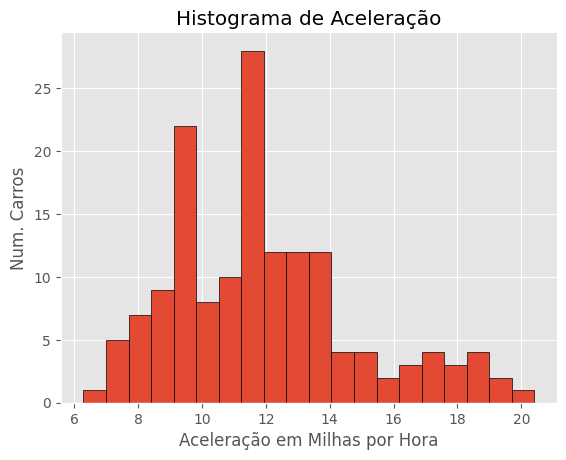

In [9]:
plt.hist(df['acceleration'], bins=20, edgecolor='k')
plt.title('Histograma de Aceleração')
plt.xlabel('Aceleração em Milhas por Hora')
plt.ylabel('Num. Carros')
despine()

A coluna Year é o ano de fabricação.

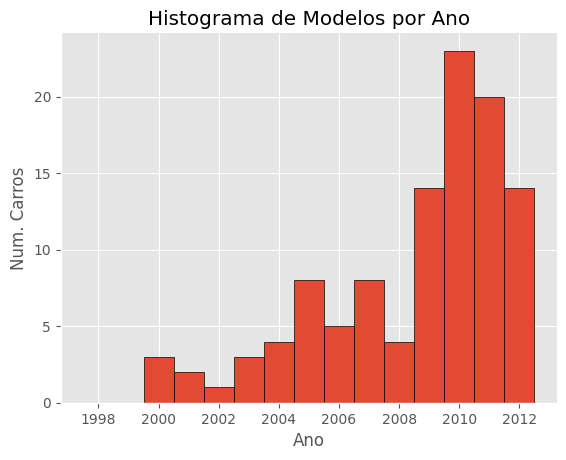

In [10]:
bins = np.arange(1997, 2013) + 0.5
plt.hist(df['year'], bins=bins, edgecolor='k')
plt.title('Histograma de Modelos por Ano')
plt.xlabel('Ano')
plt.ylabel('Num. Carros')
despine()

A coluna MSRP é o preço do carro.

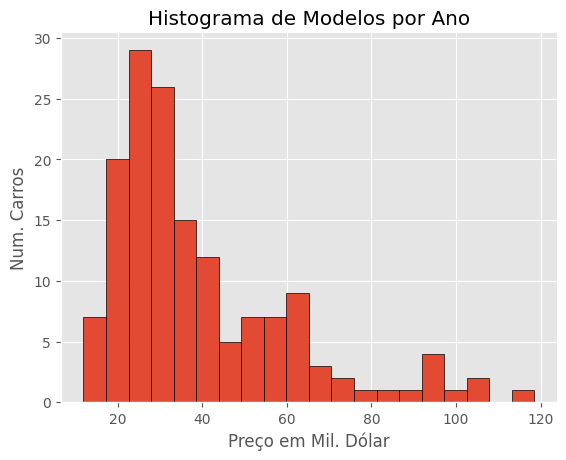

In [11]:
plt.hist(df['msrp'], bins=20, edgecolor='k')
plt.title('Histograma de Modelos por Ano')
plt.xlabel('Preço em Mil. Dólar')
plt.ylabel('Num. Carros')
despine()

A coluna MPG captura as milhas por hora.

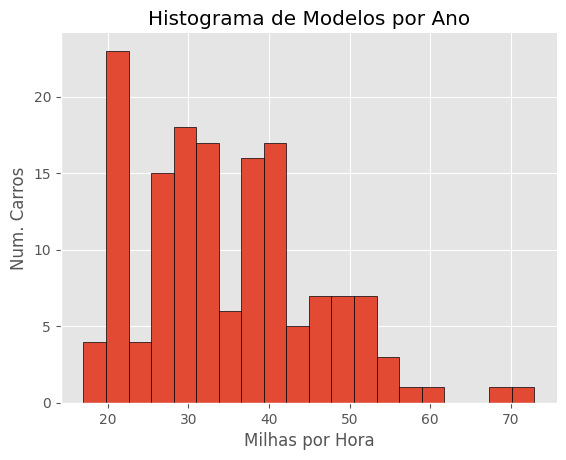

In [12]:
plt.hist(df['mpg'], bins=20, edgecolor='k')
plt.title('Histograma de Modelos por Ano')
plt.xlabel('Milhas por Hora')
plt.ylabel('Num. Carros')
despine()

Os gráficos acima nos dão uma visão geral dos dados. Note que, como esperado, cada coluna tem uma faixa diferente de valores no eixo-x. Além do mais, a concentração (lado esquerdo/direito) diferente entre as colunas. Como que podemos comparae as colunas? Cada uma está representada em uma unidade diferente.

Vamos fazer os gráficos de dispersão para todos os pares.

### Dispersão

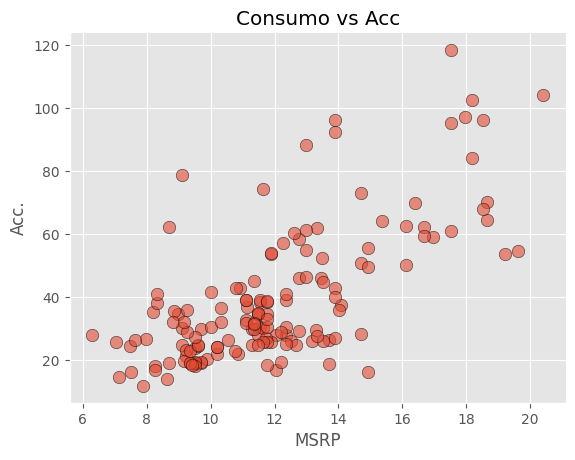

In [13]:
plt.scatter(df['acceleration'], df['msrp'], edgecolor='k', alpha=0.6, s=80)
plt.xlabel('MSRP')
plt.ylabel('Acc.')
plt.title('Consumo vs Acc')
despine()

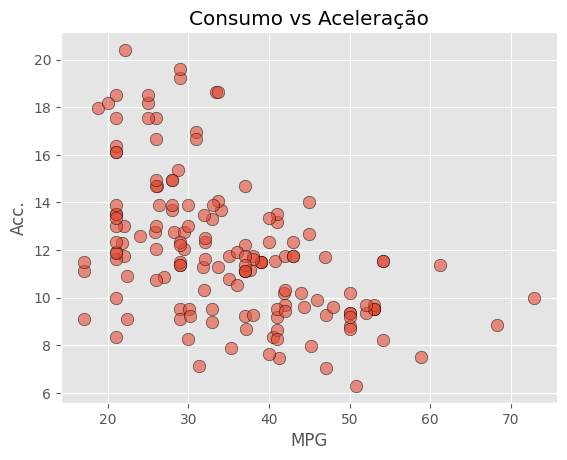

In [14]:
plt.scatter(df['mpg'], df['acceleration'], edgecolor='k', alpha=0.6, s=80)
plt.xlabel('MPG')
plt.ylabel('Acc.')
plt.title('Consumo vs Aceleração')
despine()

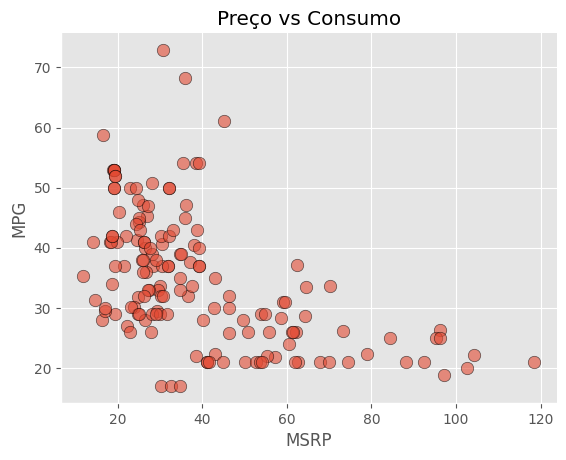

In [15]:
plt.scatter(df['msrp'], df['mpg'], edgecolor='k', alpha=0.6, s=80)
plt.xlabel('MSRP')
plt.ylabel('MPG')
plt.title('Preço vs Consumo')
despine()

## Covariânça

Agora analisaremos a covariância, o análogo pareado da variância. Enquanto a variância mede como uma única variável se desvia de sua média, a covariância mede como duas variáveis $X = \{x_1, \cdots, x_n\}$ e $Y = \{y_1, \cdots, y_n\}$  variam em conjunto a partir de suas médias $\bar{x}$ e $\bar{y}$:

$$cov(X, Y) = \frac{\sum_{i=1}^{n}{(x_i - \bar{x})(y_i - \bar{y})}}{n-1},$$

$$(x_i - \bar{x})(y_i - \bar{y})$$

In [16]:
def covariance(x, y):
    n = len(x)
    x_m = x - np.mean(x)
    y_m = y - np.mean(y)
    return (x_m * y_m).sum() / (n - 1)

In [17]:
covariance(df['acceleration'], df['msrp'])

43.809528657120744

In [18]:
covariance(df['msrp'], df['mpg'])

-125.00248062016253

Entendendo a estatística. Quando os elementos correspondentes de `x` e `y` estão ambos acima de suas médias ou ambos abaixo de suas médias, um número positivo entra na soma. Quando um está acima de sua média e o outro abaixo, um número negativo entra na soma. Assim, uma covariância positiva “grande” significa que `x` tende a ser grande quando `y` é grande, e pequeno quando `y` é pequeno. Uma covariância negativa “grande” significa o oposto - que `x` tende a ser pequeno quando `y` é grande e vice-versa. Uma covariância próxima de zero significa que não existe tal relação.

Para entender, veja a tabela abaixo que mostra três colunas novas. Inicialmente podemos ver a diferença de cada coluna com sua média. Por fim, podemos ver também uma coluna impacto. A mesma tem valor 1 quando o sinal é o mesmo das colunas subtraídas da média. Uma métrica de correlação vai ser proporcional ao valor da soma deste impacto.

In [19]:
df_n = df[['msrp', 'mpg']].copy()
df_n['msrp_menos_media'] = df_n['msrp'] - df['msrp'].mean()
df_n['mpg_menos_media'] = df_n['mpg'] - df['mpg'].mean()
df_n['impacto'] = np.zeros(len(df_n)) - 1
df_n['impacto'][(df_n['mpg_menos_media'] > 0) & (df_n['msrp_menos_media'] > 0)] = 1
df_n['impacto'][(df_n['mpg_menos_media'] < 0) & (df_n['msrp_menos_media'] < 0)] = 1
df_n.head(n=20)

/tmp/ipykernel_7057/1255057851.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_n['impacto'][(df_n['mpg_menos_media'] > 0) & (df_n['msrp_menos_media'] > 0)] = 1
/tmp/ipykernel_7057/1255057851.py:6: FutureWarning: ChainedAssignmentError

,msrp,mpg,msrp_menos_media,mpg_menos_media,impacto
0,24.50974,41.26,-14.809695,6.462549,-1.0
1,35.35497,54.10,-3.964465,19.302549,-1.0
2,26.83225,45.23,-12.487185,10.432549,-1.0
3,18.93641,53.00,-20.383025,18.202549,-1.0
4,25.83338,47.04,-13.486055,12.242549,-1.0
5,19.03671,53.00,-20.282725,18.202549,-1.0
6,19.13701,53.00,-20.182425,18.202549,-1.0
7,38.08477,40.46,-1.234665,5.662549,-1.0
8,19.13701,53.00,-20.182425,18.202549,-1.0
9,14.07192,41.00,-25.247515,6.202549,-1.0


In [20]:
def corr(x, y):
    n = len(x)
    x_m = x - np.mean(x)
    x_m = x_m / np.std(x, ddof=1)
    y_m = y - np.mean(y)
    y_m = y_m / np.std(y, ddof=1)
    return (x_m * y_m).sum() / (n - 1)

No entanto, a covariância pode ser difícil de interpretar por duas razões principais:

* Suas unidades são o produto das unidades das entradas. Como interpretar o produto de aceleração por preço?
* A métrica não é normalizada. Cov(X, Y) de -125 é um valor alto? Note que ao multiplica X * 2 a mesma duplica, mas uma relação linear não muda muito neste caso.

Por esse motivo, é mais comum observar a [correlação de Pearson](https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_Pearson). Uma forma de estimar a mesma é padronizar as variáveis. Assim, vamos fazer uma transformada $Z$:

$$\hat{X} = \frac{X - \bar{x}}{s_x}$$

$$\hat{Y} = \frac{Y - \bar{y}}{s_y}$$

Lembrando que $\bar{x}$ é a média e $s_x$ o desvio padrão. Podemos estimar os mesmos dos dados. Ao computar a covariânça com os novos valores normalizados, teremos um resultado final entre 0 e 1. 

$$corr(X, Y) = \frac{\sum_i \frac{x_i - \bar{x}}{s_x} \frac{y_i - \bar{x}}{s_y}}{n-1}$$

Ou de forma equivalente: $corr(X, Y) = \frac{cov(X, Y)}{s_x s_y}$.

In [21]:
corr(df['acceleration'], df['msrp'])

0.6955778996913979

In [22]:
corr(df['msrp'], df['mpg'])

-0.5318263633683785

Por fim, a biblioteca __seaborn__ permite observar todas as correlações em um único plot!

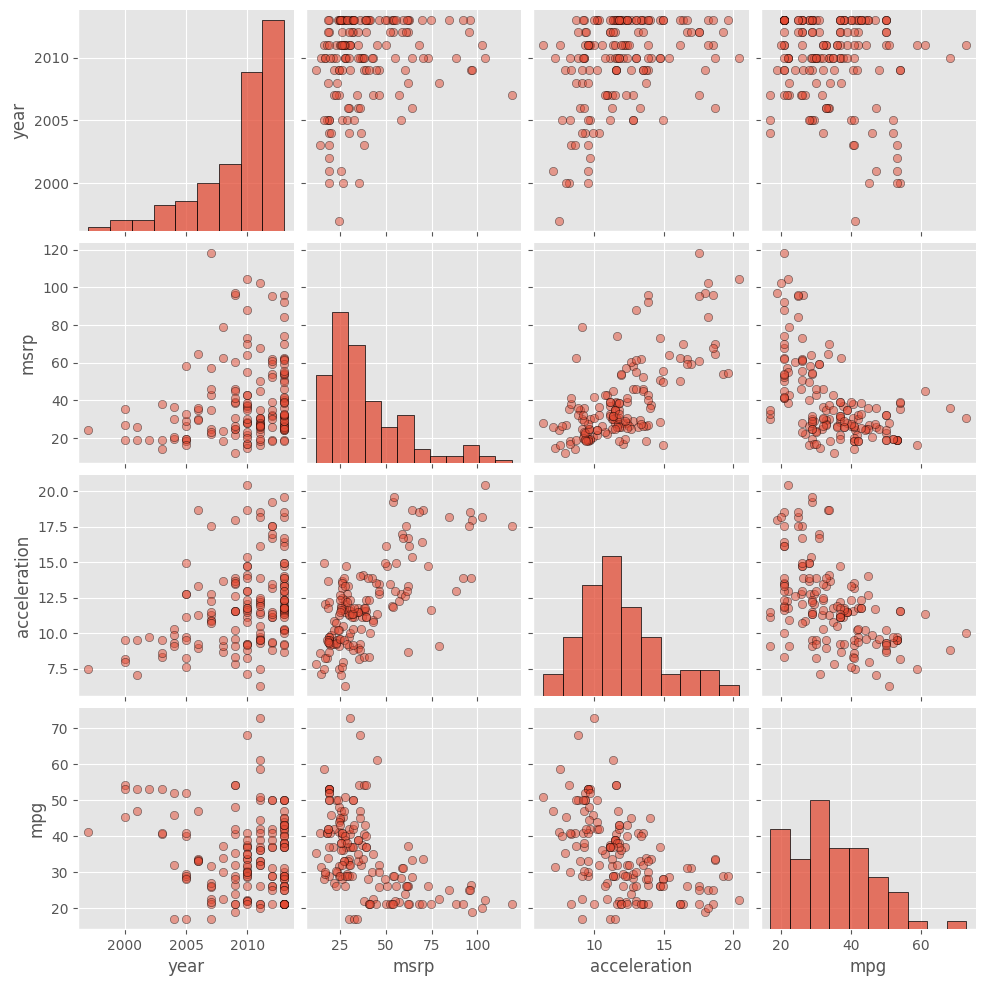

In [23]:
sns.pairplot(df, diag_kws={'edgecolor':'k'}, plot_kws={'alpha':0.5, 'edgecolor':'k'})

## Entendendo uma correlação

Nas próximas aulas vamos explorar o conceito de regressão linear. As nossas correlações até o momento já estão explorando tal correlação. Abaixo vemos 4 bases de dados com a melhor regressão.

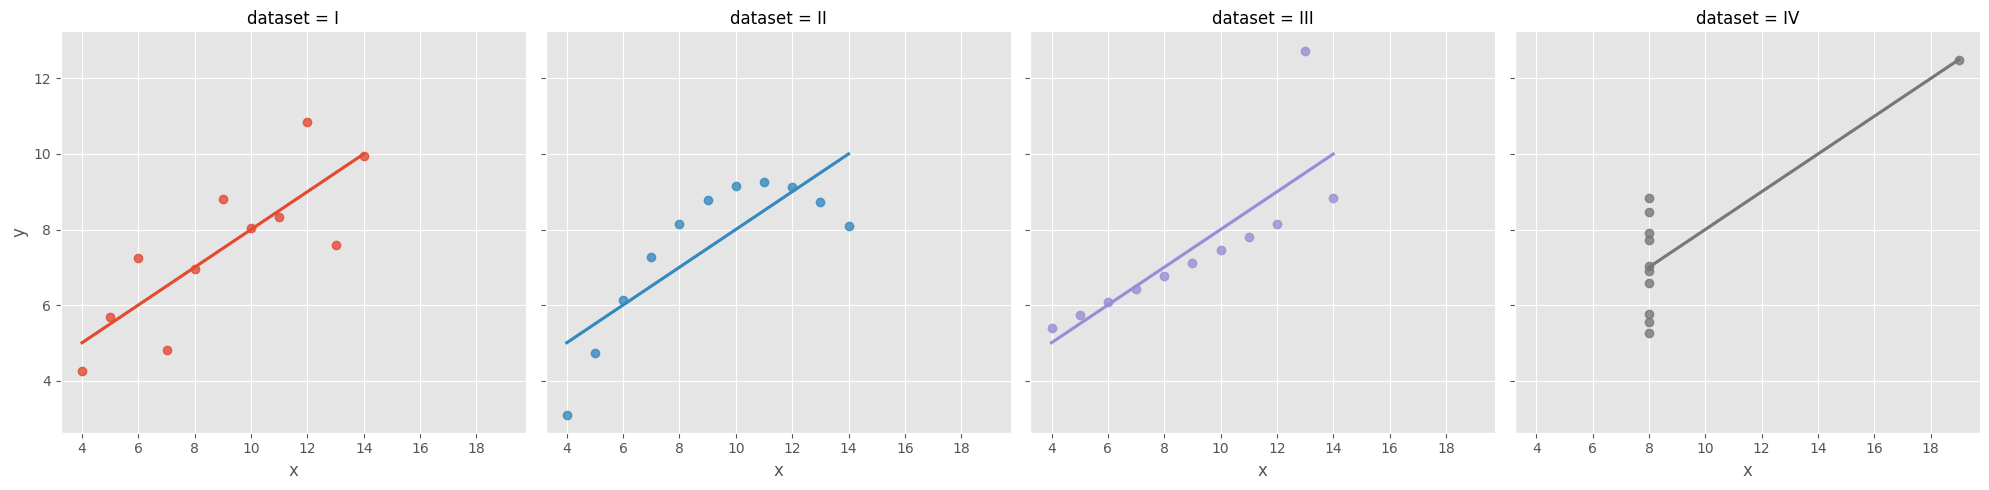

In [24]:
anscombe = sns.load_dataset('anscombe')
sns.lmplot(x='x', y='y', col='dataset', hue='dataset', data=anscombe, ci=None)

In [25]:
for data in ['I', 'II', 'IV', 'V']:
    sub = anscombe.query(f'dataset == "{data}"')
    if sub.values.any():
        print('spearman', ss.spearmanr(sub['x'], sub['y'])[0])
        print('pearson', ss.pearsonr(sub['x'], sub['y'])[0])
        print()

spearman 0.8181818181818182
pearson 0.81642051634484

spearman 0.690909090909091
pearson 0.8162365060002428

spearman 0.5
pearson 0.816521436888503



## Algumas Outras Advertências Correlacionais

Uma correlação de zero indica que não há relação linear entre as duas variáveis. No entanto, outros tipos de relacionamentos podem existir. Por exemplo, se:

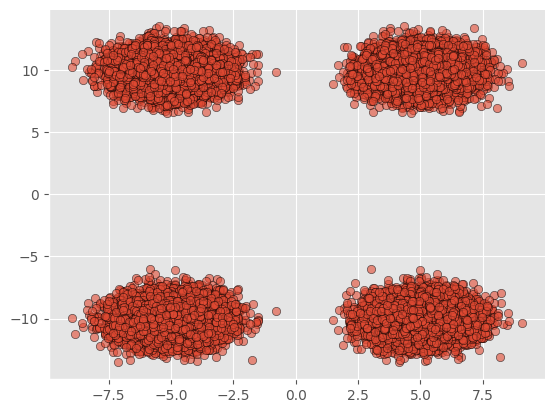

In [26]:
x1 = np.random.normal(5, 1, 10000)
x2 = np.random.normal(-5, 1, 10000)
y1 = np.random.normal(10, 1, 10000)
y2 = np.random.normal(-10, 1, 10000)
x = np.concatenate((x1, x2, x2, x1))
y = np.concatenate((y1, y2, y1, y2))
plt.scatter(x, y, alpha=0.6, edgecolors='k')
despine()

então `x` e `y` têm correlação perto de zero. Mas eles certamente têm um relacionamento. Observe os quatro grupos!

## Correlação e Causalidade

Lembrando de que que "correlação não é causalidade", provavelmente por alguém que olha dados que representam um desafio para partes de sua visão de mundo que ele estava relutante em questionar. No entanto, este é um ponto importante - se `x` e `y` estão fortemente correlacionados, isso pode significar que `x` causa `y`, `y` causa `x`, que cada um causa o outro, que algum terceiro fator causa ambos, ou pode não significar nada.

Nos exemplos acima:

1. Quanto maior o consumo de um carro, mais o mesmo acelera. Podemos concluir causalidade?
1. Quanto maior a aceleração, maior o preço. Podemos concluir causalidade?

No primeiro caso temos uma relação física, para obter uma maior velocidade precisamos queimar mais combustível. Isto é esperado dado a mecânica do carro. E no segundo caso?! Pode existir uma série de variáveis que levam a um maior preço. Não podemos dizer que é apenas a aceleração. Pode ser que os carros que aceleram mais são carros esportivos. O mesmo vai ter um preço alto mesmo se não acelerar muito.

## Paradoxo de Simpson

Correlação está medindo a relação entre suas duas variáveis **sendo todo o resto igual**. Ou seja, não controlamos por nenhum outro efeito. Assuma que os dados agoram vêm de grupos diferentes. Se seus grupos de dados são atribuídos uniforme, como em um experimento bem projetado, **sendo todo o resto igual** pode não ser uma suposição terrível. Mas quando há um padrão mais profundo para atribuições de grupos, **sendo todo o resto igual** pode ser uma suposição terrível.

Considere os dados sintéticos abaixo. Parece que temos uma correlação linear!

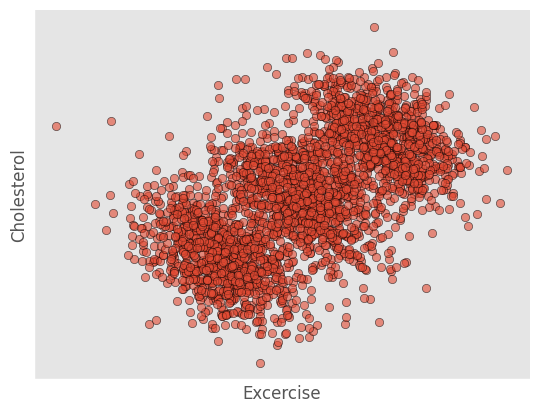

In [27]:
x1 = np.random.normal(10, 1, 1000)
y1 = -x1 + np.random.normal(0, 2, 1000)

x2 = np.random.normal(12, 1, 1000)
y2 = -x2 + np.random.normal(6, 2, 1000)

x3 = np.random.normal(14, 1, 1000)
y3 = -x3 + np.random.normal(12, 2, 1000)

x = np.concatenate([x1, x2, x3])
y = np.concatenate([y1, y2, y3])
plt.scatter(x, y, edgecolor='k', alpha=0.6)
plt.xlabel('Excercise')
plt.ylabel('Cholesterol')
plt.xticks([])
plt.yticks([])
despine()

Porém eu, Flavio, escolhi os grupos de forma que afetam o resultado. Embora sejam dados sintéticos, tal efeito já foi observado em estudos sobre colesterol.

1. Existe um crescimento no colesterol com a idade.
1. Porém, existe uma redução com atividade física.

O paradoxo: Não podemos ver o segundo ponto, pois o crescimento com a idade domina.

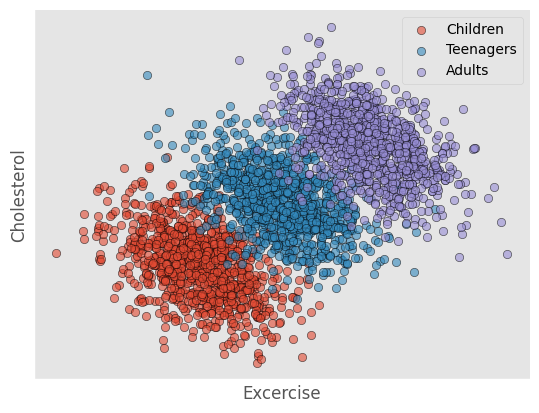

In [28]:
x1 = np.random.normal(10, 1, 1000)
y1 = -x1 + np.random.normal(0, 2, 1000)

x2 = np.random.normal(12, 1, 1000)
y2 = -x2 + np.random.normal(6, 2, 1000)

x3 = np.random.normal(14, 1, 1000)
y3 = -x3 + np.random.normal(12, 2, 1000)

plt.scatter(x1, y1, edgecolor='k', alpha=0.6, label='Children')
plt.scatter(x2, y2, edgecolor='k', alpha=0.6, label='Teenagers')
plt.scatter(x3, y3, edgecolor='k', alpha=0.6, label='Adults')
plt.xlabel('Excercise')
plt.ylabel('Cholesterol')
plt.xticks([])
plt.yticks([])
plt.legend()
despine()